<a href="https://colab.research.google.com/github/SampannaMishra/telecom-churn-analysis/blob/main/Sampanna_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**Loading Data And Importing Modules**

In [91]:
# importing the required packages
import numpy as np
import pandas as pd
# import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [92]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# insert the dataset
telcom_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone project/Copy of Telecom Churn.csv')

**Understanding more about the Dataset**

In [94]:
# viewing the top five rows

telcom_data.head(5)




,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# getting the shape of the dataset with rows and columns

telcom_data.shape

(3333, 20)

In [7]:
# Various features used in the dataset

print("Features used in the dataset are")
telcom_data.columns

Features used in the dataset are


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**Short Description of Features:**


*   State : 51 unique states have been used
*   Account Length : Length of the account

*   Area code : Code number of areas of some states
*   International plan : Yes indicates international plan is present and No indicates no subscription for international plan.

*   Voice mail plan : Yes indicates subscription is present and No indicates no subscription for Voice mail.
*   Number vmail messages : 

*   Total day minutes
*   Total day calls

*   Total day charge
*   Total eve minutes

*   Total eve calls
*   Total eve charge

*   Total night minutes
*   Total night calls

*   Total night charge
*   Total intl minutes

*   Total intl calls
*   Total intl charge

*   Customer service calls
*   Churn





















In [ ]:
# concise summary of the dataframe
telcom_data.info()
# we see there are 3333 entries and no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# checking for the count of missing value for each column
telcom_data.isnull().sum()

# We find there are no missing values in the dataset


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# Checking duplicate values

len(telcom_data[telcom_data.duplicated()])

# no duplicate rows found based on all columns

0


*   After using few basic methods few inference can be drawn:

*   There are 3333 rows and 20 columns in the dataset.
*   The various datatypes present in the dataset are:

*  One Boolean Datatype
*  Eight Float Datatype

*   Eight Integer Datatype

*   Three Object Datatype i.e categorical values are present
*   No trace of missing values found.


*   There are no duplicate values present in the dataset.



**Exploratory Data Analysis Of the Dataset**

Analysing the Dependent Variable 'Churn'

In [ ]:
# Churn is the target variable
# Printing the count of True and False in 'Churn' Feature

telcom_data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

<function matplotlib.pyplot.show>

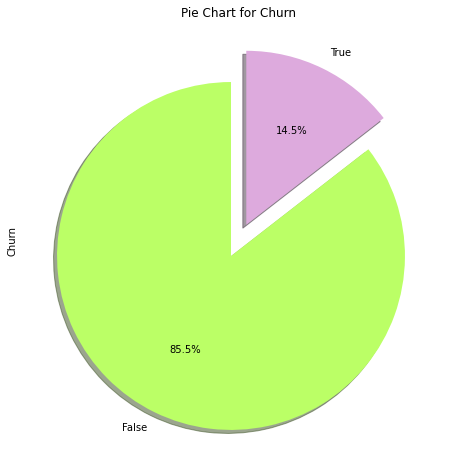

In [ ]:
# Pie Chart to show churn
telcom_data ['Churn'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', startangle=90,shadow=True, figsize=(8,8),colors = ['#bbff66','#ddaadd'])
plt.title('Pie Chart for Churn')
plt.show
                                             

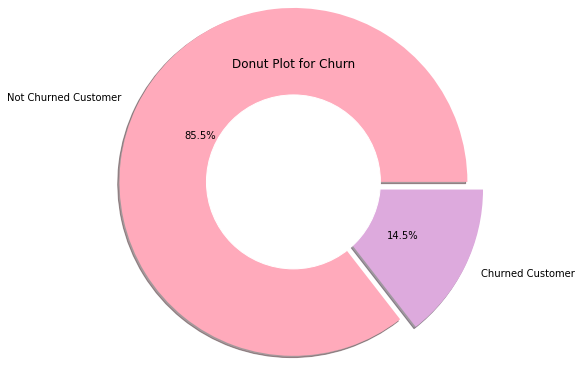

In [ ]:
# to get the donut plot to analyse churn
data_churn = telcom_data['Churn'].value_counts()
explode = (0,0.2)
plt.pie(data_churn,explode = explode,autopct = '%1.1f%%',shadow=True,radius = 2.0,labels = ['Not Churned Customer','Churned Customer'],colors=['#ffaabb','#ddaadd'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

After analysing the Churn column its evident that approximately 15% of customers have churned  

In [ ]:
telcom_data.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


<function matplotlib.pyplot.show>

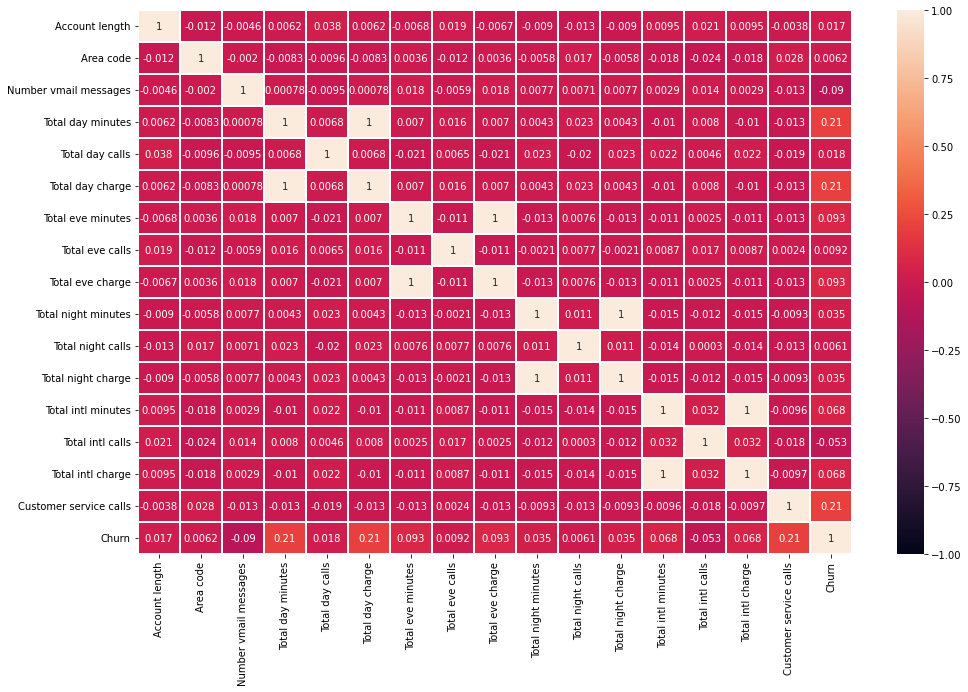

In [ ]:
# shows the positive or negative correlation of features with Churn column
plt.figure(figsize=(16,10))
sns.heatmap(telcom_data.corr(),vmin = -1,vmax= 1, annot = True,linewidths= 1)
plt.show

**Analysing State Column**

In [8]:
# printing the unique value off state column
telcom_data['State'].nunique()

51

In [32]:
# Values of Percentage Churn corresponding to each State 

State_data = pd.crosstab(telcom_data["State"],telcom_data["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

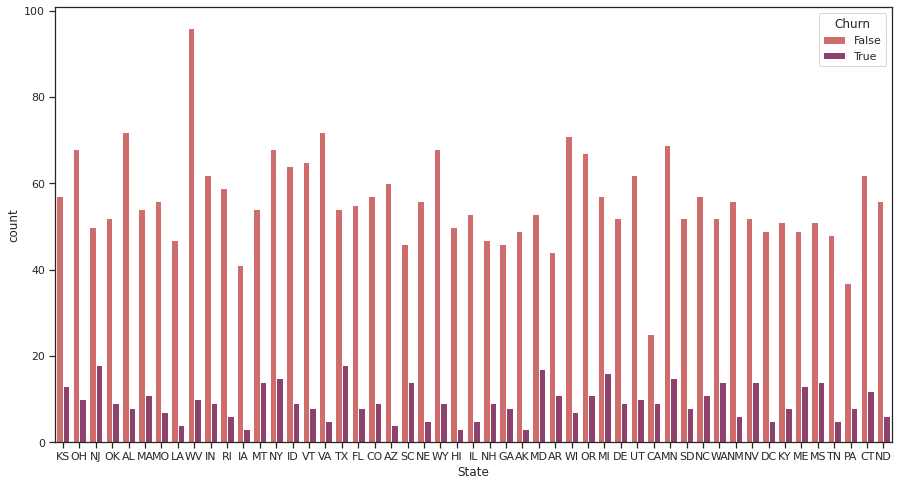

In [57]:
# comparision churn with state 
sns.set(style="ticks")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=telcom_data, palette = 'flare')
plt.show()

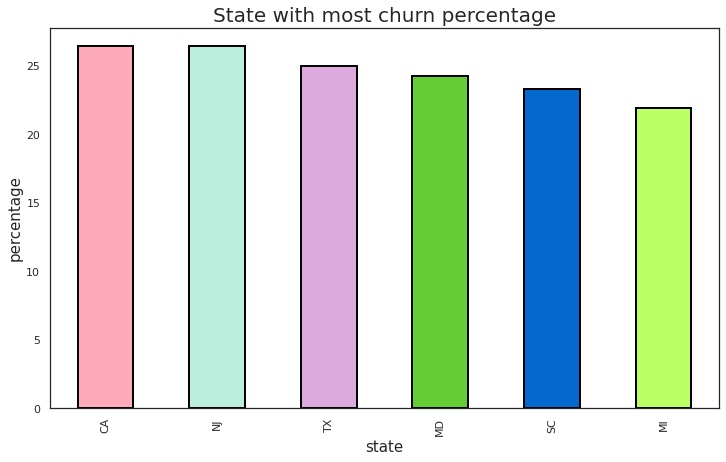

In [48]:
plt.rcParams['figure.figsize'] = (12,7)
color = plt.cm.flag(np.linspace(0,0.5,20))
((telcom_data.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['#ffaabb','#bbeedd','#ddaadd','#66cc33','#0369cf','#bbff66'],edgecolor='black',lw=2)
plt.title("State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

From the above analysis we founnd that there are few states like CA, NJ, TX,MD,SC,MI who have higher Churn Rate i.e greater than 21%.

**Analysing the Account Length**

In [83]:
Accountlength_data = pd.crosstab(telcom_data["Account length"],telcom_data["Churn"])
Accountlength_data['Percentage_Churn'] = Accountlength_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Accountlength_data)

Churn           False  True  Percentage_Churn
Account length                               
1                   7     1              12.5
2                   0     1             100.0
3                   5     0               0.0
4                   1     0               0.0
5                   1     0               0.0
...               ...   ...               ...
221                 1     0               0.0
224                 1     1              50.0
225                 1     1              50.0
232                 1     0               0.0
243                 1     0               0.0

[212 rows x 3 columns]


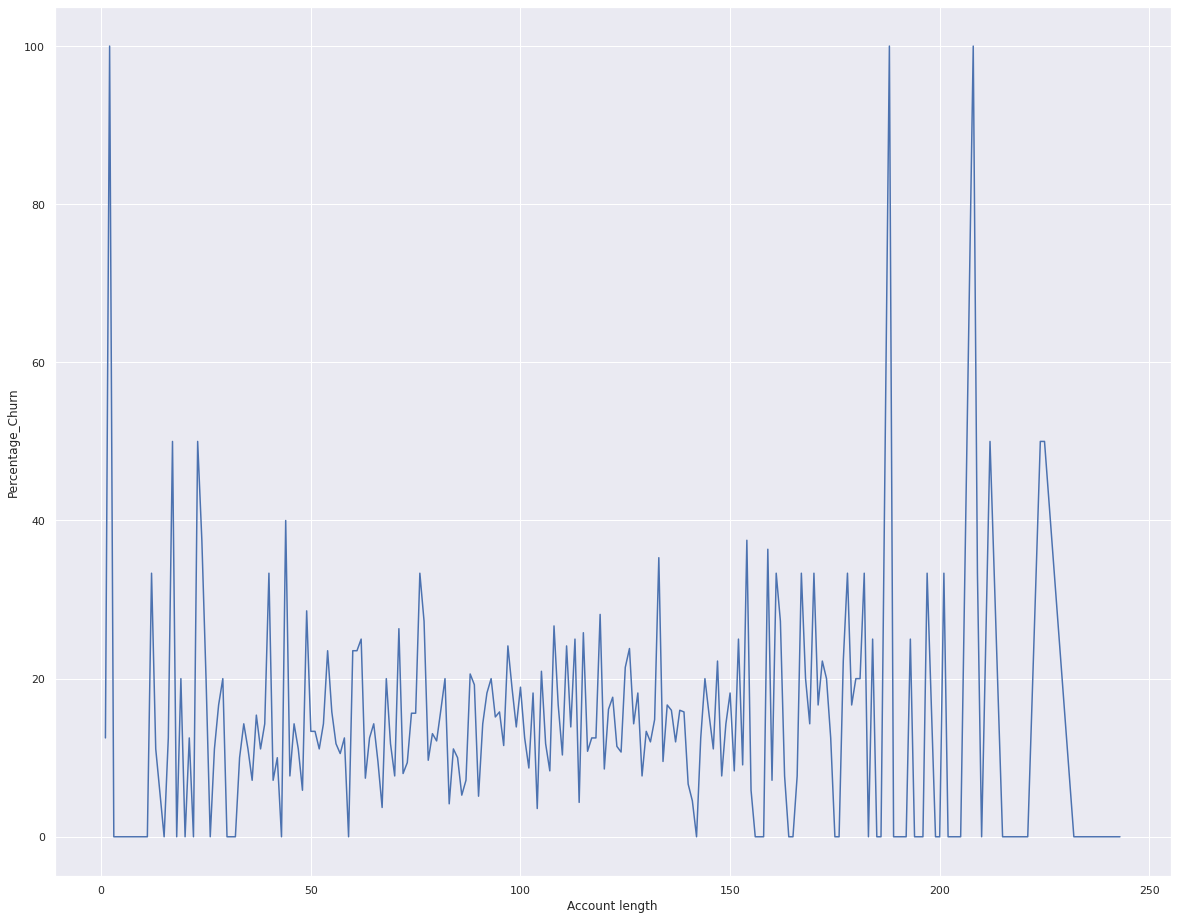

In [88]:
plt.figure(figsize = (20,16))
sns.lineplot(data=Accountlength_data, x="Account length", y="Percentage_Churn")

After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. 

**Analysing the Area Code**

In [ ]:
Areacode_data = pd.crosstab(telcom_data["Area code"],telcom_data["Churn"])
Areacode_data['Percentage_Churn'] = Areacode_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Areacode_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


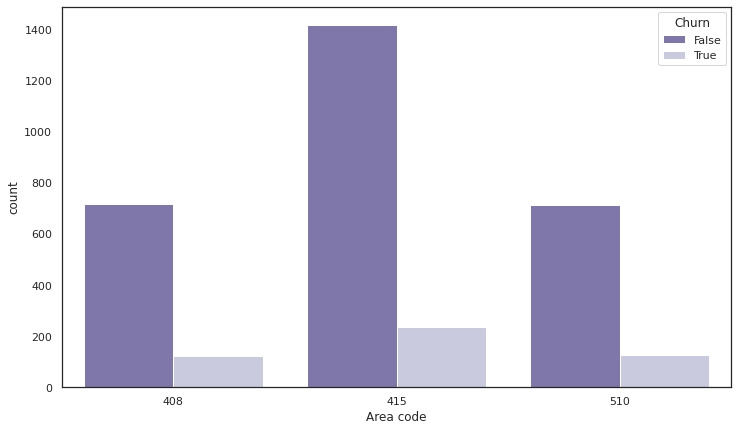

In [46]:
sns.set(style = "white")
ax = sns.countplot(x='Area code' , hue="Churn", data= telcom_data , palette = 'Purples_r')
plt.show()

*In the above analysis we observe that there are only three unique Area Codes and the churn rate of these area codes are almost same.Most probably there is not any relationship between area code and churn.*

**Analysing International Plan Column**

In [ ]:
# show count of  international plans

telcom_data['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
# Calculate the international plan vs Churn percentage
Inter_plan_data = pd.crosstab(telcom_data["International plan"],telcom_data["Churn"])
Inter_plan_data['Percentage Churn'] = Inter_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Inter_plan_data)


Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


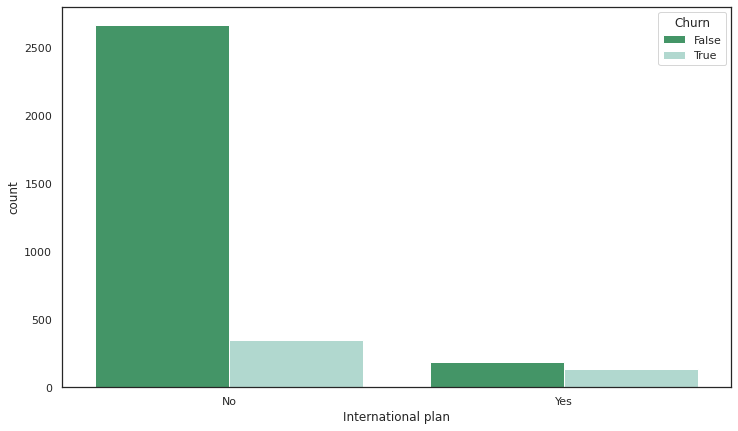

In [43]:
sns.set(style = "white")
sns.countplot(x='International plan',hue="Churn",data = telcom_data , palette = 'BuGn_r')

*From the above analysis we observe that customers having international plans among those 42.4% churn. Customer who donot have this plan among those only 11.4% churn. So customers who bought international plan churned in big numbers.*

**Analyzing Voice mail plan**

In [95]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(telcom_data["Voice mail plan"],telcom_data["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


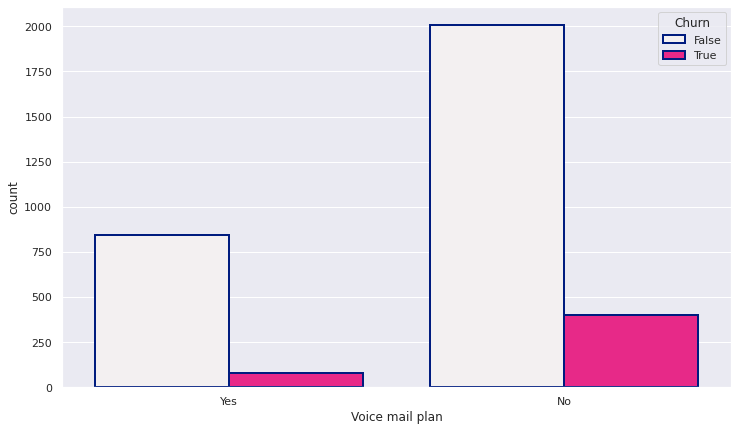

In [80]:
# analysing by Voice mail plan vs Churn
sns.set(style="darkgrid")
sns.countplot(x='Voice mail plan',hue="Churn",data = telcom_data , color ='#ff1188',saturation=0.8,linewidth=2,
                   edgecolor=sns.color_palette("dark", 1))

As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything about its dependency.

**Analyzing "Number vmail messages" column**

In [ ]:
telcom_data['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [ ]:
telcom_data['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: Number vmail messages, dtype: int64

In [ ]:
telcom_data['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


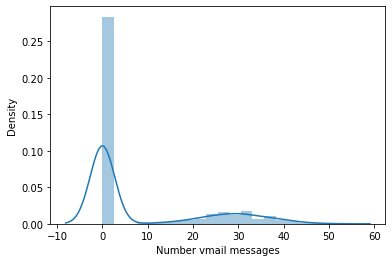

In [ ]:
sns.distplot(telcom_data['Number vmail messages'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x576 with 0 Axes>

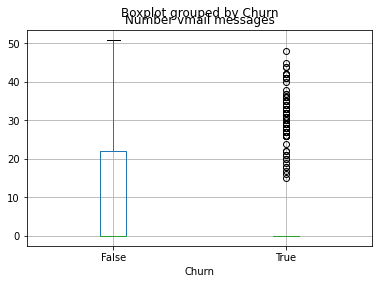

In [ ]:
# analysing using boxplot between 'no.of vmail messages' and 'churn'

fig = plt.figure(figsize=(10,8))
telcom_data.boxplot(column='Number vmail messages', by ='Churn')
fig.suptitle('Number vmail  message', fontsize = 14 , fontweight = 'bold')
plt.show()


In [ ]:
# calculating the customer service calls vs churn percentage

cust_service_calls = pd.crosstab(telcom_data['Customer service calls'],telcom_data["Churn"])
cust_service_calls['Percebtage_Churn'] = cust_service_calls.apply(lambda x : x[1]*100/(x[0]+x[1]),axis =1)
print(cust_service_calls)


Churn                   False  True  Percebtage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


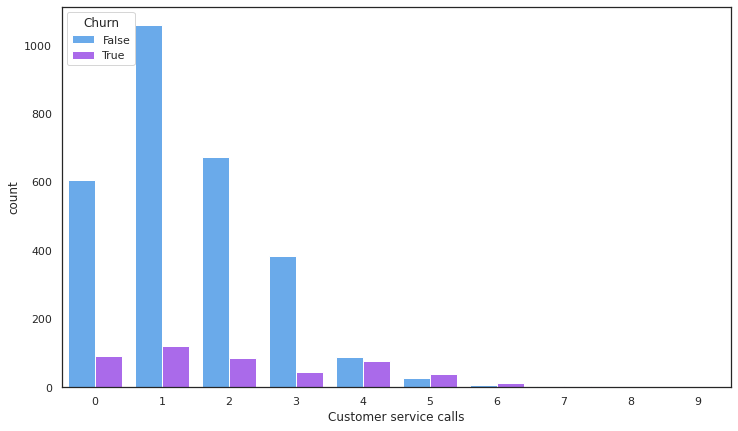

In [55]:
sns.countplot(x='Customer service calls',hue="Churn", data = telcom_data , palette='cool')

Its evident that from the above analysis because of bad customer service ,people tend to leave the operator.t is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.

The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,

And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.

So operator should work to improve the service call.